## Necesssary libraries

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import pickle

## Import the dataset

In [23]:
iris=pd.read_csv("IRIS_ Flower_Dataset.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory data analysis

### Analysis of the data

In [24]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check if there are nulls values

In [26]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
#or
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Visualize all the dataset

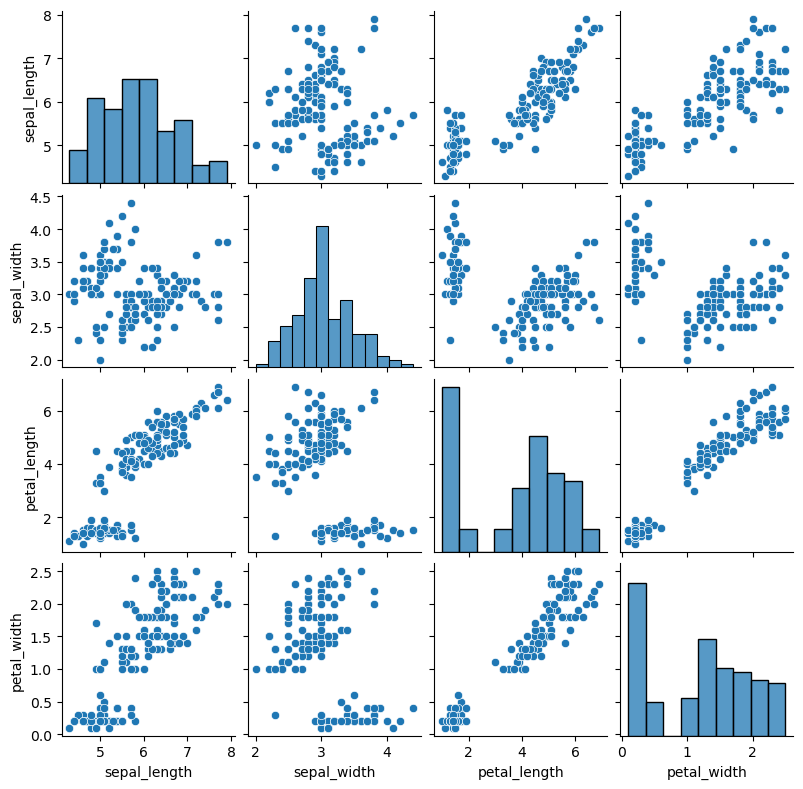

In [28]:
sns.pairplot(iris, height=2)

## Split the data into train-test

In [29]:
x=iris.iloc[:, :4]
y=iris.iloc[:, 4]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

## Building the model

In [30]:
model= SVC()

In [31]:
model.fit(x_train,y_train)

SVC()

In [32]:
pred=model.predict(x_test)

In [33]:
pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [34]:
accuracy=accuracy_score(y_test,pred)
print(f"Accuracy of the model is {round(accuracy,2)}")

Accuracy of the model is 0.97


## Evaluation of the model

In [35]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



0.97


<AxesSubplot:>

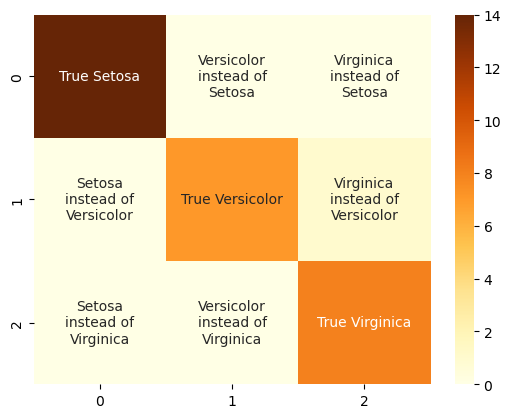

In [36]:
model_score=model.score(x_test, y_test)
print(round(model_score, 2))
conf=confusion_matrix(y_test,pred)
plt.xlabel('True label')
plt.ylabel('Predicted label')
labels=['True Setosa', 'Versicolor\ninstead of\nSetosa','Virginica\ninstead of\nSetosa', 'Setosa\ninstead of\nVersicolor', 'True Versicolor', 'Virginica\ninstead of\nVersicolor','Setosa\ninstead of\nVirginica', 'Versicolor\ninstead of\nVirginica', 'True Virginica']
labels=np.asarray(labels).reshape(3, 3)
sns.heatmap(conf, annot=labels, fmt='', cmap='YlOrBr')

<AxesSubplot:>

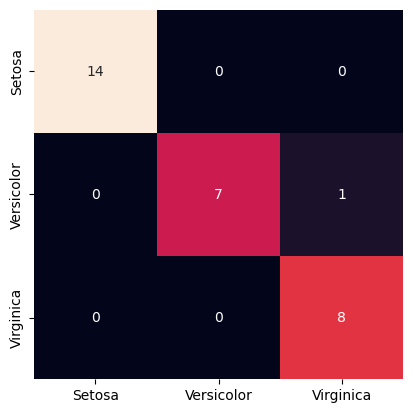

In [37]:
sns.heatmap(conf, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Setosa', 'Versicolor', 'Virginica'],yticklabels=['Setosa', 'Versicolor', 'Virginica'] )

## Improvement by hyper-parameter modification

In [38]:
c_val=np.linspace(0.1, 10)
grid = {'C': c_val,'kernel': ['linear', 'rbf', 'poly'],'gamma': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 'scale', 'auto']}

In [39]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, n_jobs=-1)

In [40]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.14081633,  4.34285714,  4.54489796,  4.74693878,  4.94897959,
        5.15102041,  5.35306122,  5.55510204,  5.75714286,  5.95918367,
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ]),
                         'gamma': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [41]:
print("Best Hyperparameters: ", grid_search.best_params_)
print(f"Best Accuracy Score: {round(grid_search.best_score_, 2)}")

Best Hyperparameters:  {'C': 1.1102040816326533, 'gamma': 0.1, 'kernel': 'linear'}
Best Accuracy Score: 0.98


## Saving the model

In [42]:
with open('iris_model', 'wb') as files:
    pickle.dump(model, files)